In [1]:
%matplotlib inline
#from bokeh.io import output_notebook
#rom bokeh.plotting import *
from matmodlab2 import *
from numpy import *
#output_notebook()
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


Setting up the Matmodlab notebook environment


In [2]:

"""
def B(X_0):
    X_0 = 0
    x = array([-0.324190879399528  , -0.5910265708699819 , -0.18063603062696332,
       -0.38121381734569654, -0.6175628700881645 , -0.23576228096254312,
       -0.28240916917730036, -0.5473481732181913 , -0.16744427128767322,
       -0.2630318047470945 , -0.4235775835834732 , -0.04148242995369289,
        0.5943025397254625 ,  0.5770764819925227 ,  0.05778373947936392,
       -0.4019021627391064 ,  0.6422532886726127 , -0.9725103257468183 ,
        0.564662540091747  , -0.32419465         , -0.59102337         ,
       -0.18063179         , -0.38121066         , -0.61755865         ,
       -0.23576606         , -0.28240491         , -0.54735189         ,
       -0.16744104         , -0.358838           , -0.42357774         ,
       -0.04148228         ,  0.5943027          ,  0.57707663         ,
        0.0577839          , -0.40190232         ,  0.64225345         ,
       -0.97251048         ,  0.56466269         ])
    eq = (array([[x[0], x[1], x[2]],
            [x[3], x[4], x[5]],
            [x[6], x[7], x[8]]])) * ((array(x[9]) + X_0 + array(x[9]) + X_0) * (X_0)) + array([[x[10], x[11], x[12] ],        
            [ x[13],  x[14] , x[15]],
            [ x[16], x[17],  x[18]]])
    return eq
"""

"""
def B(X_0):
    eq = np.eye(3)
    eq[0,0] += 1e-3
    eq[1,1] -= 1e-3
    return eq
"""

""" Using a rotation
def B(eqps):
    alpha = 10*np.pi/180
    B_in = np.array([ [1,0,0], [0, cos(alpha), -sin(alpha)], [ 0, sin(alpha), cos(alpha) ] ])
    #B_in = np.transpose(B_in) @ np.eye(3) @ B_in
    #print(B_in)
    return B_in
"""



""" Using a rotation with deviatoric independence
def B(eqps):
    alpha = 10*np.pi/180
    B_in = np.array([ [1,0,0], [0, cos(alpha), -sin(alpha)], [ 0, sin(alpha), cos(alpha) ] ])

    B_in = align_axes_with_pi_plane_rot().T @ B_in @ align_axes_with_pi_plane_rot()
    B_in[:, 2] = 0
    B_in[2, :] = 0
    B_in[2, 2] = 1
    B_in = align_axes_with_pi_plane_rot() @ B_in @ align_axes_with_pi_plane_rot().T
    #B_in = np.transpose(B_in) @ np.eye(3) @ B_in
    print('B_in', B_in)
    return B_in
"""

#""" Force deviatoric independence on a BINGO solution
def B(X_0):
    X_0 = 0
    x = array([-0.324190879399528  , -0.5910265708699819 , -0.18063603062696332,
       -0.38121381734569654, -0.6175628700881645 , -0.23576228096254312,
       -0.28240916917730036, -0.5473481732181913 , -0.16744427128767322,
       -0.2630318047470945 , -0.4235775835834732 , -0.04148242995369289,
        0.5943025397254625 ,  0.5770764819925227 ,  0.05778373947936392,
       -0.4019021627391064 ,  0.6422532886726127 , -0.9725103257468183 ,
        0.564662540091747  , -0.32419465         , -0.59102337         ,
       -0.18063179         , -0.38121066         , -0.61755865         ,
       -0.23576606         , -0.28240491         , -0.54735189         ,
       -0.16744104         , -0.358838           , -0.42357774         ,
       -0.04148228         ,  0.5943027          ,  0.57707663         ,
        0.0577839          , -0.40190232         ,  0.64225345         ,
       -0.97251048         ,  0.56466269         ])
    B_in = (array([[x[0], x[1], x[2]],
            [x[3], x[4], x[5]],
            [x[6], x[7], x[8]]])) * ((array(x[9]) + X_0 + array(x[9]) + X_0) * (X_0)) + array([[x[10], x[11], x[12] ],        
            [ x[13],  x[14] , x[15]],
            [ x[16], x[17],  x[18]]])
    B_in = align_axes_with_pi_plane_rot().T @ B_in @ align_axes_with_pi_plane_rot()
    B_in[:, 2] = 0
    B_in[2, :] = 0
    B_in[2, 2] = 1
    B_in = align_axes_with_pi_plane_rot() @ B_in @ align_axes_with_pi_plane_rot().T
    return B_in
#"""

def align_pi_plane_with_axes_rot():
    """
    Returns a matrix that rotates the pi plane's normal to be the z axis
    i.e., a slice of pi plane becomes the xy plane after rotation
    """
    pi_vector = np.array([1, 1, 1]) / np.sqrt(3.)
    # wanted_vector = np.array([1, 0, 0])
    wanted_vector = np.array([0, 0, 1])
    wanted_vector = wanted_vector / np.linalg.norm(wanted_vector)
    added = (pi_vector + wanted_vector).reshape([-1, 1])
    # from Rodrigues' rotation formula, more info here: https://math.stackexchange.com/a/2672702
    rot_mat = 2 * (added @ added.T) / (added.T @ added) - np.eye(3)
    return rot_mat


def align_axes_with_pi_plane_rot():
    """
    Returns a matrix that undoes the align_pi_plane_with_axes_rot rotation
    """
    return np.linalg.inv(align_pi_plane_with_axes_rot())

full_sdv_column_names =  [
            # ADDED
            "TIME",
            "DTIME",
            "REAL_SXX",
            "REAL_SYY",
            "REAL_SZZ",
            "REAL_SXY",
            "REAL_SYZ",
            "REAL_SXZ",
            # BEGIN ACTUAL MAT SDVS
            "FICT_EP_XX",  # 0
            "FICT_EP_YY",  # 1
            "FICT_EP_ZZ",  # 2
            "FICT_EP_XY",  # 3
            "FICT_EP_YZ",  # 4
            "FICT_EP_XZ",  # 5
            "FICT_EQPS",   # 6
            "REAL_EP_XX",  # 7
            "REAL_EP_YY",  # 8
            "REAL_EP_ZZ",  # 9
            "REAL_EP_XY",  # 10
            "REAL_EP_YZ",  # 11
            "REAL_EP_XZ",  # 12
            "REAL_EQPS",   # 13
            "Y",           # 14
            "S.VM",        # 15
            # SDVS ABOVE HERE ARE HARD CODED, do not modify SDVs above this line
            "FICT_SXX",    
            "FICT_SYY",
            "FICT_SZZ",
            "FICT_SXY",
            "FICT_SYZ",
            "FICT_SXZ", 
            "TRIAL_STRESS_POST_TRANS_XX",
            "TRIAL_STRESS_POST_TRANS_YY",
            "TRIAL_STRESS_POST_TRANS_ZZ",
            "TRIAL_STRESS_POST_TRANS_XY",
            "TRIAL_STRESS_POST_TRANS_YZ",
            "TRIAL_STRESS_POST_TRANS_XZ",
            "MML_STRESS_GUESS_XX",    
            "MML_STRESS_GUESS_YY", 
            "MML_STRESS_GUESS_ZZ", 
            "MML_STRESS_GUESS_XY",    
            "MML_STRESS_GUESS_YZ", 
            "MML_STRESS_GUESS_XZ", 
            "TRIAL_STRESS_PRE_TRANS_XX",   
            "TRIAL_STRESS_PRE_TRANS_YY",   
            "TRIAL_STRESS_PRE_TRANS_ZZ",   
            "TRIAL_STRESS_PRE_TRANS_XY",   
            "TRIAL_STRESS_PRE_TRANS_YZ",   
            "TRIAL_STRESS_PRE_TRANS_XZ",   
            "CONV_STRESS_ISO_XX", 
            "CONV_STRESS_ISO_YY", 
            "CONV_STRESS_ISO_ZZ", 
            "CONV_STRESS_ISO_XY", 
            "CONV_STRESS_ISO_YZ", 
            "CONV_STRESS_ISO_XZ", 
            "FICT_EQPS_INPUT", 
            "DELTA_EXX", 
            "DELTA_EYY", 
            "DELTA_EZZ", 
            "DELTA_EXY", 
            "DELTA_EYZ", 
            "DELTA_EXZ", 
            'DELTA_SXX',
            'DELTA_SYY',
            'DELTA_SZZ',
            'DELTA_SXY',
            'DELTA_SYZ',
            'DELTA_SXZ',
        ]
column_reorder = [ 'TIME', 'DTIME',
                    'MML_STRESS_GUESS_XX',
                    'MML_STRESS_GUESS_YY',
                    'MML_STRESS_GUESS_ZZ',
                    "MML_STRESS_GUESS_XY",    
                    "MML_STRESS_GUESS_YZ", 
                    "MML_STRESS_GUESS_XZ", 
                    'DELTA_EXX',
                    'DELTA_EYY',
                    'DELTA_EZZ',
                    "DELTA_EXY", 
                    "DELTA_EYZ", 
                    "DELTA_EXZ", 
                    'TRIAL_STRESS_PRE_TRANS_XX',
                    'TRIAL_STRESS_PRE_TRANS_YY',
                    'TRIAL_STRESS_PRE_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'DELTA_SXX',
                    'DELTA_SYY',
                    'DELTA_SZZ',
                    'DELTA_SXY',
                    'DELTA_SYZ',
                    'DELTA_SXZ',
                    'TRIAL_STRESS_POST_TRANS_XX',
                    'TRIAL_STRESS_POST_TRANS_YY',
                    'TRIAL_STRESS_POST_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'CONV_STRESS_ISO_XX',
                    'CONV_STRESS_ISO_YY',
                    'CONV_STRESS_ISO_ZZ',
                    "CONV_STRESS_ISO_XY", 
                    "CONV_STRESS_ISO_YZ", 
                    "CONV_STRESS_ISO_XZ", 
                    'FICT_SXX',
                    'FICT_SYY',
                    'FICT_SZZ',
                    "FICT_SXY",
                    "FICT_SYZ",
                    "FICT_SXZ", 
                    "FICT_EP_XX",  # 0
                    "FICT_EP_YY",  # 1
                    "FICT_EP_ZZ",  # 2
                    'REAL_EP_XX',
                    'REAL_EP_YY',
                    'REAL_EP_ZZ',
                    "REAL_SXX",
                    "REAL_SYY",
                    "REAL_SZZ",
                    "REAL_SXY",
                    "REAL_SYZ",
                    "REAL_SXZ",
                    'S.VM',]
def run_ST_GPSR_TTM(property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1 = MaterialPointSimulator('ST_GPSR_TTM')
    mps1.material = ST_GPSR_TTM(**property_dict)
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def run_CPA_alg(property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1 = MaterialPointSimulator('CPAPlasticitiy')
    mps1.material = ST_GPSR_TTM(**property_dict)
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def run_generic_mps(mps1, property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def draw_principal_axes(ax, length_of_axes=2.5, scale=100):
    """
    Draws principal axes on graph, change length of axes and scale
    """
    zero_pos = np.zeros(2)
    straight_up_pos = np.array([0, 1]) * length_of_axes
    bottom_right_pos = np.array([np.cos(-np.pi / 6.), np.sin(-np.pi / 6.)]) * length_of_axes
    bottom_left_pos = np.array([np.cos(7 * np.pi / 6.), np.sin(7 * np.pi / 6.)]) * length_of_axes

    ax.quiver(*zero_pos, *straight_up_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_2$", straight_up_pos + np.array([0.25, -0.3]) * scale)

    ax.quiver(*zero_pos, *bottom_right_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_1$", bottom_right_pos + np.array([-0.18, 0.45]) * scale)

    ax.quiver(*zero_pos, *bottom_left_pos, scale_units="xy", scale=1)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.1, -0.45]) * scale)
    ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.28, -0.4]) * scale)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([-0.18, -0.4]) * scale)



In [3]:
stress_state = np.array([1900, 2500, 2000])
stress_state

array([1900, 2500, 2000])

In [4]:
new_state = B(0) @ stress_state
back_state = np.linalg.inv(B(0)) @ new_state
dev = new_state - 1/3*np.sum(new_state)
hydro_basic = 1/3*np.sum(new_state)
stress_state, new_state, back_state, dev, hydro_basic

(array([1900, 2500, 2000]),
 array([2350.12660829, 2285.86554878, 1764.00784293]),
 array([1900., 2500., 2000.]),
 array([ 216.79327496,  152.53221545, -369.32549041]),
 2133.333333333332)

In [5]:
dev_state = stress_state - 1/3.*np.sum(stress_state)
hydro_dev = np.sum(dev_state)
new_dev = B(0) @ dev_state
back_dev = np.linalg.inv(B(0)) @ new_dev
new_dev_dev = new_dev - 1/3*np.sum(new_dev)
dev_state, new_dev, back_dev, new_dev_dev, hydro_dev

(array([-233.33333333,  366.66666667, -133.33333333]),
 array([ 216.79327496,  152.53221545, -369.32549041]),
 array([-233.33333333,  366.66666667, -133.33333333]),
 array([ 216.79327496,  152.53221545, -369.32549041]),
 9.094947017729282e-13)

In [6]:
ref_state_1 = stress_state @ align_axes_with_pi_plane_rot()

ref_state_2 = new_state @ align_axes_with_pi_plane_rot()
print(ref_state_1, ref_state_2)
dev_state_1 = dev_state @ align_axes_with_pi_plane_rot()
dev_state_2 = new_dev @ align_axes_with_pi_plane_rot()
ref_traj = np.vstack([ref_state_1[:2], ref_state_2[:2]])
dev_traj = np.vstack([dev_state_1[:2], dev_state_2[:2]])
ref_traj, dev_traj

[ 184.52994616 -415.47005384 3695.04172281] [-351.97578671 -287.7147272  3695.04172281]


(array([[ 184.52994616, -415.47005384],
        [-351.97578671, -287.7147272 ]]),
 array([[ 184.52994616, -415.47005384],
        [-351.97578671, -287.7147272 ]]))

(-600.0, 600.0)

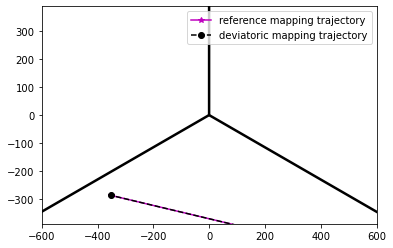

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
#print(pi_plane_vir_stress_trajectory)
plt.plot(*ref_traj.T, 'm-*', label="reference mapping trajectory")
plt.plot(*dev_traj.T, 'k--o', label="deviatoric mapping trajectory")

ax.legend()
draw_principal_axes(ax, length_of_axes=5000, scale=15)

ax.axis("equal")
ax.set_xlim([-600, 600])
ax.set_ylim([-600, 600])